In [4]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')
sns.set_style('darkgrid')

import plotly.express as px

%matplotlib inline

In [6]:
#Loading data set
df = pd.read_csv(r'C:\Users\sulem\OneDrive\Documents\World Happiness Report 2021.csv')
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [7]:
#The ladder score is a value given based on the national average response on state of well-being or happiness. 
df.rename({'Ladder score':'Happiness score'}, axis=1, inplace=True)

In [8]:
#Creating DataFrame with data that will be used in Analysis
df_2021= df[['Country name','Regional indicator','Happiness score',
                   'Logged GDP per capita','Social support','Healthy life expectancy',
                   'Freedom to make life choices','Generosity','Perceptions of corruption']].copy()
df_2021.head()

,Country name,Regional indicator,Happiness score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [19]:
#Data Information
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  149 non-null    object 
 1   Regional indicator            149 non-null    object 
 2   Happiness score               149 non-null    float64
 3   Logged GDP per capita         149 non-null    float64
 4   Social support                149 non-null    float64
 5   Healthy life expectancy       149 non-null    float64
 6   Freedom to make life choices  149 non-null    float64
 7   Generosity                    149 non-null    float64
 8   Perceptions of corruption     149 non-null    float64
dtypes: float64(7), object(2)
memory usage: 10.6+ KB


In [20]:
#Checking for null data
df_2021.isnull().sum()

Country name                    0
Regional indicator              0
Happiness score                 0
Logged GDP per capita           0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [21]:
#Data Statistics
df_2021.describe()

,Happiness score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450
std,1.073924,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226
min,2.523000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000
25%,4.852000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000
50%,5.534000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000
75%,6.255000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000
max,7.842000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000


Text(0.5, 1.0, 'Distribution of Happiness Score')

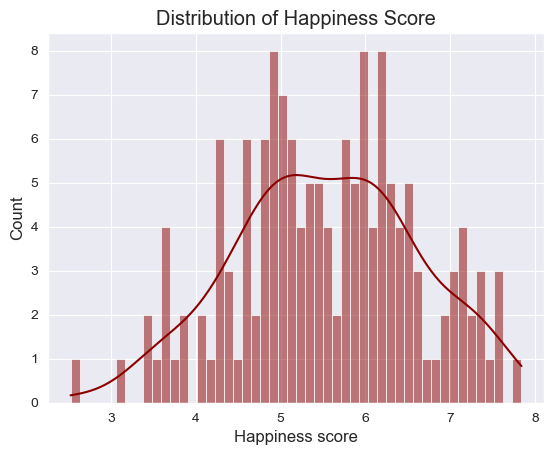

In [94]:
#Distribution of Happiness score
sns.histplot(df_2021['Happiness score'],kde=True,bins=50,color='darkred')
plt.title('Distribution of Happiness Score')

<AxesSubplot:xlabel='Happiness score', ylabel='Logged GDP per capita'>

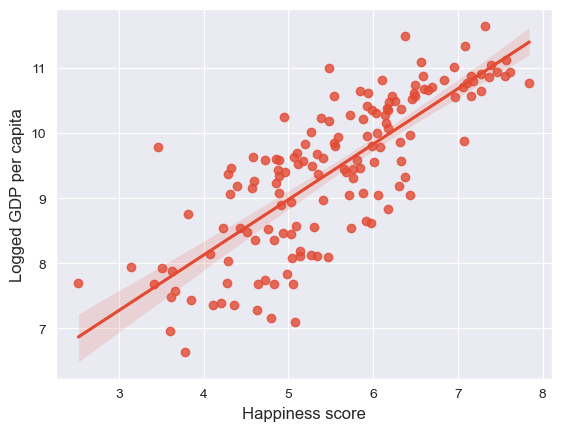

In [22]:
#Correlation between Happiness score and other values measured
sns.regplot(x='Happiness score', y='Logged GDP per capita', data=df_2021)

<AxesSubplot:xlabel='Happiness score', ylabel='Healthy life expectancy'>

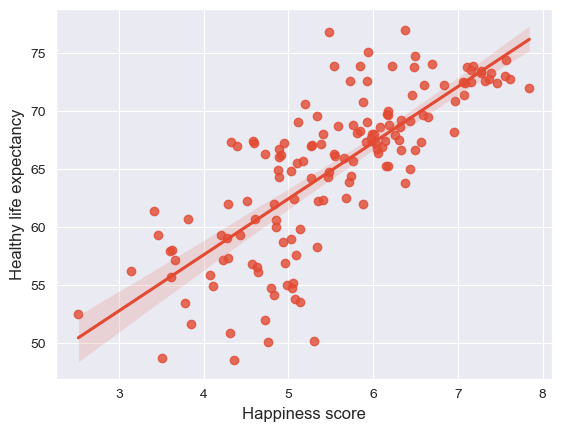

In [23]:
sns.regplot(x='Happiness score', y='Healthy life expectancy', data=df_2021)

<AxesSubplot:xlabel='Happiness score', ylabel='Social support'>

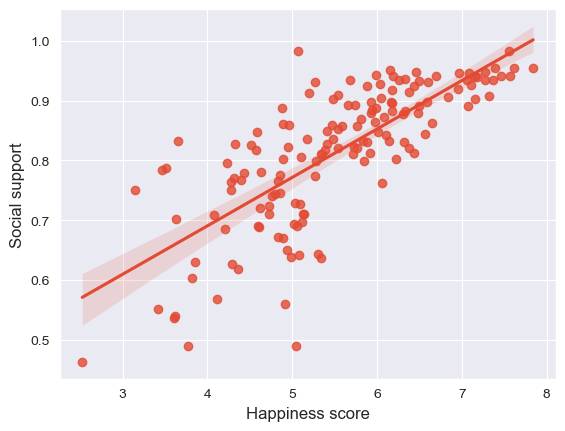

In [24]:
sns.regplot(x='Happiness score', y='Social support', data=df_2021)

<AxesSubplot:xlabel='Happiness score', ylabel='Freedom to make life choices'>

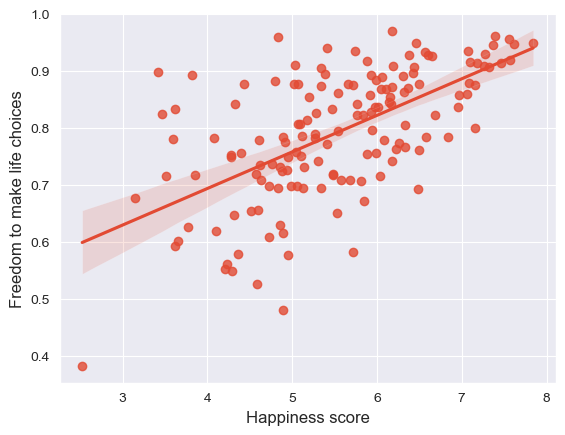

In [25]:
sns.regplot(x='Happiness score', y='Freedom to make life choices', data=df_2021)

<AxesSubplot:xlabel='Happiness score', ylabel='Generosity'>

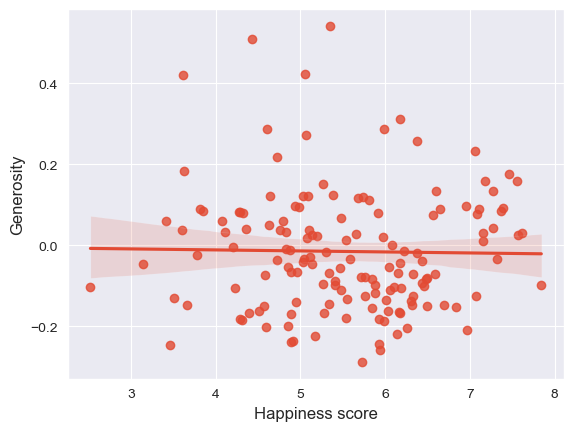

In [26]:
sns.regplot(x='Happiness score', y='Generosity', data=df_2021)

<AxesSubplot:xlabel='Happiness score', ylabel='Perceptions of corruption'>

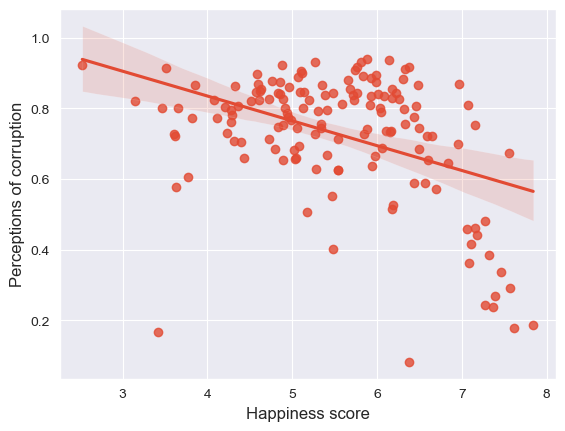

In [27]:
sns.regplot(x='Happiness score', y='Perceptions of corruption', data=df_2021)

In [31]:
#Countries - highest vs lowest Happiness score
Country_Region = df_2021.groupby(['Country name', 'Regional indicator'])[['Happiness score']].sum()
Country_Region = Country_Region.sort_values('Happiness score', ascending=False)
Country_Region.head(10)

,,Happiness score
Country name,Regional indicator,
Finland,Western Europe,7.842
Denmark,Western Europe,7.620
Switzerland,Western Europe,7.571
Iceland,Western Europe,7.554
Netherlands,Western Europe,7.464
Norway,Western Europe,7.392
Sweden,Western Europe,7.363
Luxembourg,Western Europe,7.324
New Zealand,North America and ANZ,7.277


In [32]:
Country_Region.tail(10)

,,Happiness score
Country name,Regional indicator,
Burundi,Sub-Saharan Africa,3.775
Yemen,Middle East and North Africa,3.658
Tanzania,Sub-Saharan Africa,3.623
Haiti,Latin America and Caribbean,3.615
Malawi,Sub-Saharan Africa,3.600
Lesotho,Sub-Saharan Africa,3.512
Botswana,Sub-Saharan Africa,3.467
Rwanda,Sub-Saharan Africa,3.415
Zimbabwe,Sub-Saharan Africa,3.145


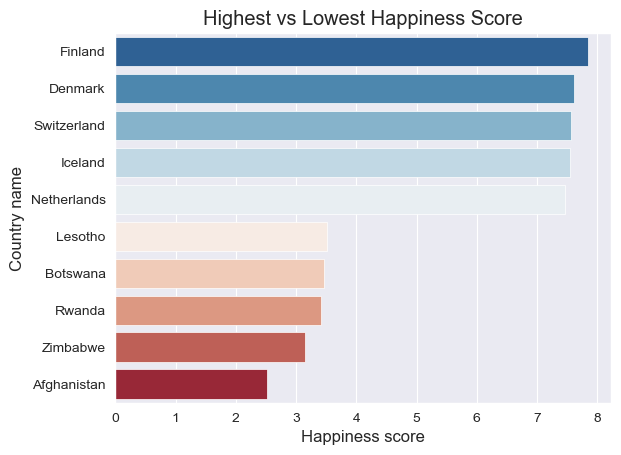

In [95]:
df2021_happiest = df_2021[(df_2021.loc[:, "Happiness score"] > 7.4)| (df_2021.loc[:, "Happiness score"] < 3.6)]
sns.barplot(x = "Happiness score", y = "Country name", data=df2021_happiest, palette = "RdBu_r")
plt.title("Highest vs Lowest Happiness Score")
plt.show()

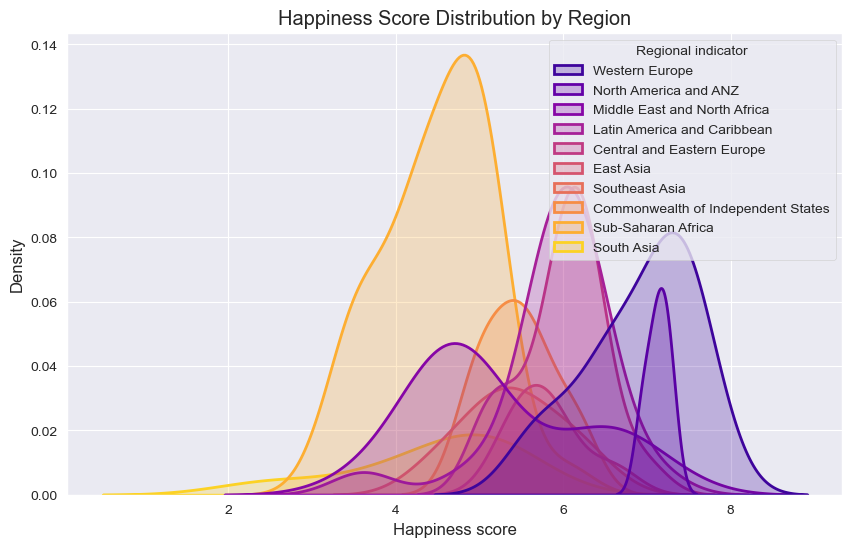

In [99]:
#Observing positively correlated factors by region
fig = plt.figure(figsize=(10, 6))
sns.kdeplot(df_2021["Happiness score"], hue = df_2021["Regional indicator"], fill = True, linewidth=2, palette='plasma')
plt.title("Happiness Score Distribution by Region")
plt.show()

In [96]:
fig = px.scatter(data_frame=df_2021, x="Happiness score", y="Logged GDP per capita", size='Happiness score', 
                 size_max=20,
                 color="Regional indicator", color_discrete_sequence= px.colors.sequential.Plasma, 
                 title='Logged GDP per capita by Region')
fig.show()

Text(0.5, 1.0, 'Social support by Region')

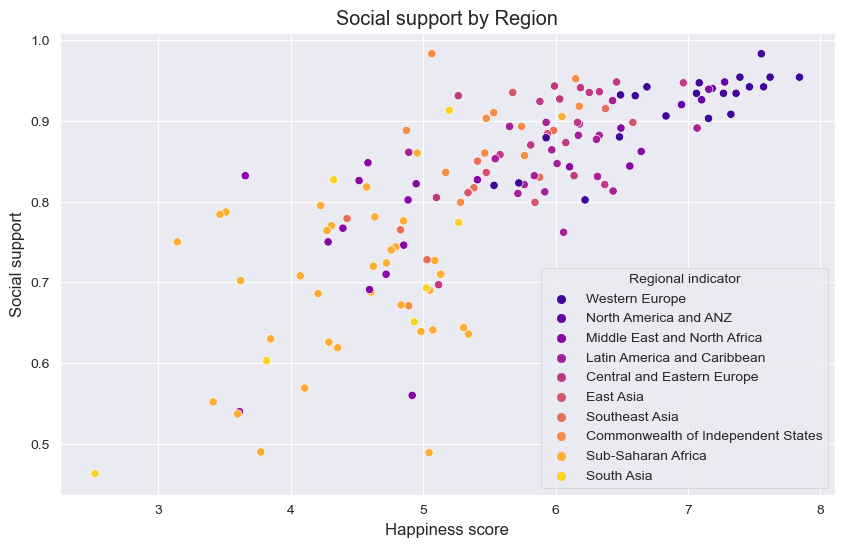

In [100]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x='Happiness score',y='Social support', data=df_2021, hue='Regional indicator', palette = 'plasma')
plt.title('Social support by Region')

<function matplotlib.pyplot.show(close=None, block=None)>

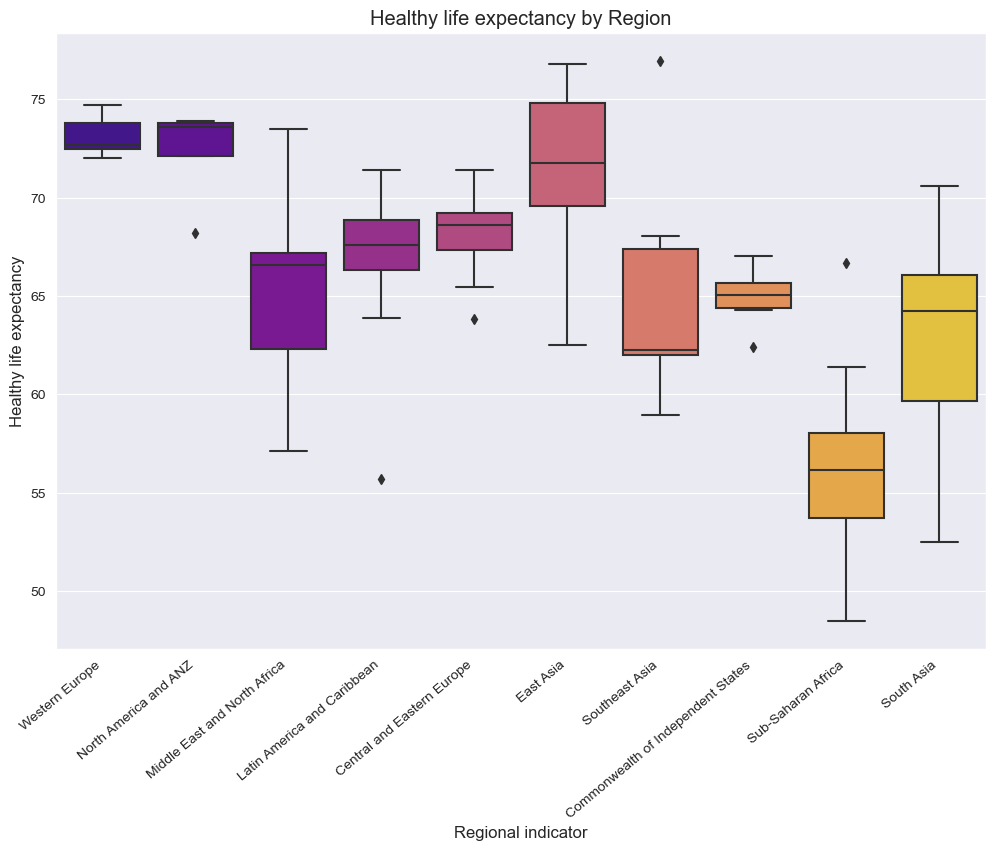

In [64]:
fig = plt.figure(figsize=(12,8))
ax = sns.boxplot(x='Regional indicator', y='Healthy life expectancy', data=df, palette='plasma')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Healthy life expectancy by Region')
plt.show

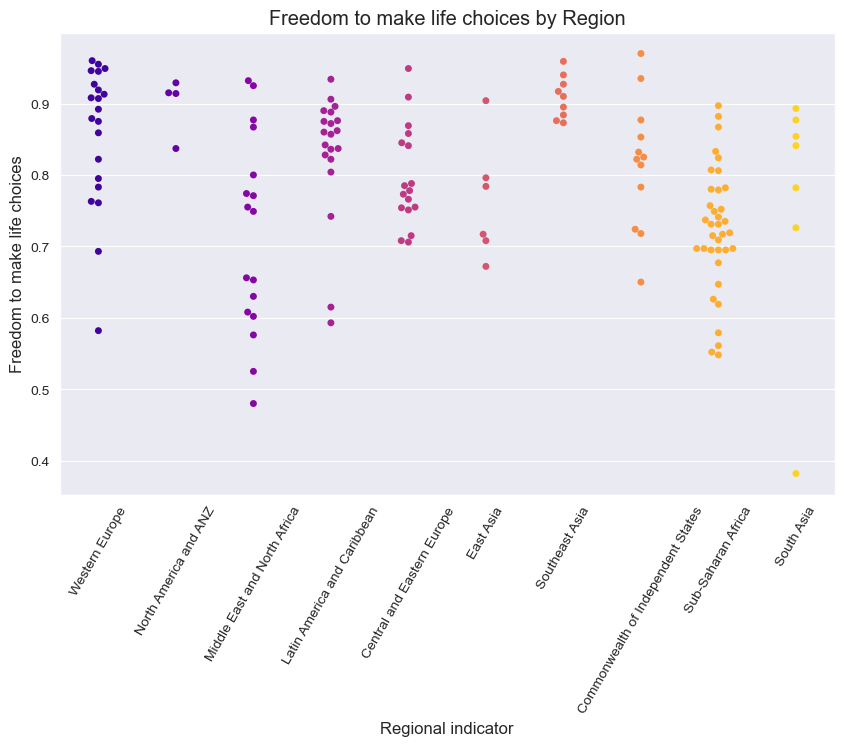

In [101]:
fig = plt.figure(figsize=(10,6))
sns.swarmplot(x='Regional indicator', y='Freedom to make life choices', data=df_2021, palette='plasma')
plt.xticks(rotation = 60)
plt.title("Freedom to make life choices by Region")
plt.show()

<AxesSubplot:>

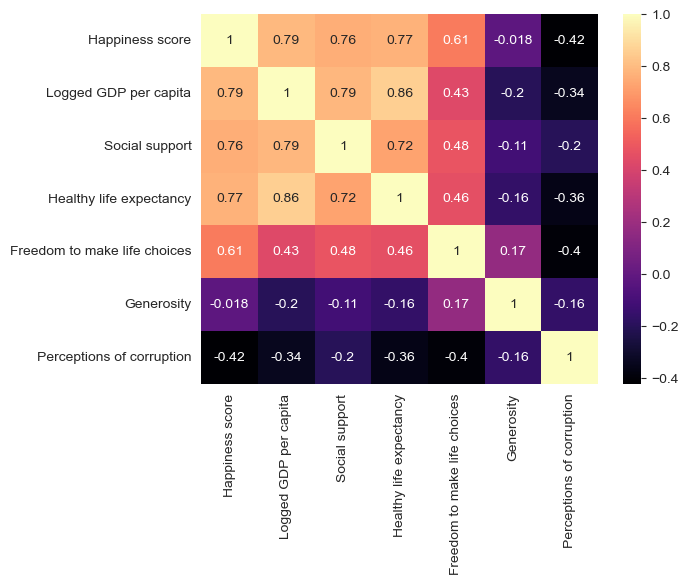

In [13]:
#Correlation Matrix
correlation_matrix = df_2021.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='magma')

In [102]:
#Correlation Unstacked
correlation_mat = df_2021.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

Happiness score               Happiness score                 1.000000
                              Logged GDP per capita           0.789760
                              Social support                  0.756888
                              Healthy life expectancy         0.768099
                              Freedom to make life choices    0.607753
                              Generosity                     -0.017799
                              Perceptions of corruption      -0.421140
Logged GDP per capita         Happiness score                 0.789760
                              Logged GDP per capita           1.000000
                              Social support                  0.785299
                              Healthy life expectancy         0.859461
                              Freedom to make life choices    0.432323
                              Generosity                     -0.199286
                              Perceptions of corruption      -0.342337
Social

In [103]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

Perceptions of corruption     Happiness score                -0.421140
Happiness score               Perceptions of corruption      -0.421140
Freedom to make life choices  Perceptions of corruption      -0.401363
Perceptions of corruption     Freedom to make life choices   -0.401363
Healthy life expectancy       Perceptions of corruption      -0.364374
Perceptions of corruption     Healthy life expectancy        -0.364374
                              Logged GDP per capita          -0.342337
Logged GDP per capita         Perceptions of corruption      -0.342337
Perceptions of corruption     Social support                 -0.203207
Social support                Perceptions of corruption      -0.203207
Generosity                    Logged GDP per capita          -0.199286
Logged GDP per capita         Generosity                     -0.199286
Perceptions of corruption     Generosity                     -0.163962
Generosity                    Perceptions of corruption      -0.163962
      

In [92]:
#Highly correlated pairs
highly_correlatedpairs = sorted_pairs[(sorted_pairs)> 0.5]

highly_correlatedpairs

Freedom to make life choices  Happiness score                 0.607753
Happiness score               Freedom to make life choices    0.607753
Social support                Healthy life expectancy         0.723256
Healthy life expectancy       Social support                  0.723256
Happiness score               Social support                  0.756888
Social support                Happiness score                 0.756888
Healthy life expectancy       Happiness score                 0.768099
Happiness score               Healthy life expectancy         0.768099
Social support                Logged GDP per capita           0.785299
Logged GDP per capita         Social support                  0.785299
                              Happiness score                 0.789760
Happiness score               Logged GDP per capita           0.789760
Logged GDP per capita         Healthy life expectancy         0.859461
Healthy life expectancy       Logged GDP per capita           0.859461
Happin